# Merging data

In [1]:
import pandas as pd

In [2]:
# Load the datasets
stooq_df = pd.read_csv('results/stooq_merged.csv')
gdelt_df = pd.read_csv('results/gdelt_economic_signals.csv')

print("Stooq dataset shape:", stooq_df.shape)
print("GDELT dataset shape:", gdelt_df.shape)
print("\nFirst few dates from Stooq:", stooq_df['Date'].head())
print("\nFirst few dates from GDELT:", gdelt_df['Date'].head())

Stooq dataset shape: (4289, 25)
GDELT dataset shape: (4631, 5)

First few dates from Stooq: 0    2013-04-01
1    2013-04-02
2    2013-04-03
3    2013-04-04
4    2013-04-05
Name: Date, dtype: object

First few dates from GDELT: 0    20130406
1    20130405
2    20130407
3    20130401
4    20130413
Name: Date, dtype: int64


In [3]:
# Convert GDELT date format from '20130406' to '2013-04-06'
gdelt_df['Date'] = pd.to_datetime(gdelt_df['Date'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

print("Converted GDELT dates:")
print(gdelt_df['Date'].head())

Converted GDELT dates:
0    2013-04-06
1    2013-04-05
2    2013-04-07
3    2013-04-01
4    2013-04-13
Name: Date, dtype: object


In [4]:
# Merge datasets on Date (inner join to keep only shared dates)
merged_df = pd.merge(stooq_df, gdelt_df, on='Date', how='inner').dropna(how="any", axis=0)

print(f"Merged dataset shape: {merged_df.shape}")
print(f"\nNumber of shared dates: {len(merged_df)}")
print(f"\nDate range: {merged_df['Date'].min()} to {merged_df['Date'].max()}")
print("\nFirst few rows of merged dataset:")
merged_df

Merged dataset shape: (2927, 29)

Number of shared dates: 2927

Date range: 2013-04-02 to 2025-12-02

First few rows of merged dataset:


,Date,MSFT_Open,MSFT_Close,MSFT_Volume,NKX_Open,NKX_Close,NKX_Volume,NDX_Open,NDX_Close,NDX_Volume,...,AAPL_Open,AAPL_Close,AAPL_Volume,SPX_Open,SPX_Close,SPX_Volume,News_Sentiment,News_Disagreement,News_Volatility,News_Volume
2,2013-04-02,23.3841,23.5588,3.479098e+07,12051.57,12003.43,2.744706e+09,2809.00,2820.62,2.725517e+08,...,13.0579,13.1249,619413882.0,1562.17,1570.25,1.840089e+09,-2.037748,3.777087,6.568702,11640
3,2013-04-02,23.3841,23.5588,3.479098e+07,12051.57,12003.43,2.744706e+09,2809.00,2820.62,2.725517e+08,...,13.0579,13.1249,619413882.0,1562.17,1570.25,1.840089e+09,-2.037748,3.777087,6.568702,11640
4,2013-04-03,23.5148,23.3596,4.286561e+07,12112.09,12362.20,2.350040e+09,2821.97,2795.04,3.127431e+08,...,13.1732,13.1910,424559739.0,1570.25,1553.69,2.255894e+09,-2.174459,3.731097,6.649827,12604
5,2013-04-03,23.5148,23.3596,4.286561e+07,12112.09,12362.20,2.350040e+09,2821.97,2795.04,3.127431e+08,...,13.1732,13.1910,424559739.0,1570.25,1553.69,2.255894e+09,-2.174459,3.731097,6.649827,12604
6,2013-04-04,23.2240,23.3841,5.533617e+07,12188.22,12634.54,3.093806e+09,2794.42,2794.93,2.544345e+08,...,13.2461,13.0608,419245607.0,1553.69,1559.98,1.861483e+09,-2.141963,3.756189,6.618138,12091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4616,2025-11-25,474.0700,476.9900,2.801979e+07,49113.82,48659.52,1.444754e+09,24790.07,25018.36,1.332991e+09,...,275.2700,276.9700,46914220.0,6697.03,6765.88,3.329985e+09,-0.456922,4.080827,6.843367,80083
4617,2025-11-26,486.3100,485.5000,2.570908e+07,49012.25,49559.07,1.341321e+09,25168.31,25236.94,9.978964e+08,...,276.9600,277.5500,33431423.0,6793.55,6812.61,2.733199e+09,-0.651273,4.134776,6.892623,80148
4619,2025-11-28,487.5950,492.0100,1.438673e+07,50218.96,50253.91,9.823054e+08,25310.29,25434.89,6.371038e+08,...,277.2600,278.8500,20135620.0,6822.52,6849.09,1.476620e+09,-0.830720,4.204370,6.984102,61462
4622,2025-12-01,488.4350,486.7400,2.396399e+07,50318.59,49303.28,1.181701e+09,25232.75,25342.85,1.042249e+09,...,278.0100,283.1000,46587722.0,6812.30,6812.63,2.809389e+09,-0.709380,4.271857,6.977046,67326


In [5]:
# Save the merged dataset
merged_df.to_csv('results/merged_stooq_gdelt.csv', index=False)
print("Merged dataset saved to 'results/merged_stooq_gdelt.csv'")

Merged dataset saved to 'results/merged_stooq_gdelt.csv'


# Modelling

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load your data
df = pd.read_csv('results/merged_stooq_gdelt.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').set_index('Date')

# === 2. Feature Engineering ===
data = df.copy()

# A. Create Target: Predict SPX Direction Next Day (1=Up, 0=Down)
# We use Log Returns for stationarity
data['Return'] = np.log(data['SPX_Close'] / data['SPX_Close'].shift(1))
data['Target'] = (data['Return'].shift(-1) > 0).astype(int)

# B. Market Features (Stationary)
# 1. Past Returns (Lags) - Does momentum persist?
data['Ret_Lag1'] = data['Return']
data['Ret_Lag2'] = data['Return'].shift(1)
data['Ret_Lag5'] = data['Return'].shift(4)

# 2. Volatility (Risk)
data['Vol_20'] = data['Return'].rolling(20).std()

# 3. Intraday Momentum (Replaces Price_Pos)
# If Close > Open, it indicates intraday buying pressure.
data['Intraday_Move'] = (data['SPX_Close'] - data['SPX_Open']) / data['SPX_Open']

# C. Sentiment Features (The Alpha)
# Smooth the noise: Daily sentiment is erratic; 3-day and 7-day trends are signals.
data['Sent_MA_3'] = data['News_Sentiment'].rolling(3).mean()
data['Sent_MA_7'] = data['News_Sentiment'].rolling(7).mean()
data['Sent_Vol_5'] = data['News_Volatility'].rolling(5).mean() # Stability of news
data['Sent_Disagreement_MA'] = data['News_Disagreement'].rolling(3).mean()

# Interaction: Sentiment * Volume
# High sentiment is more significant when News Volume is high.
# We normalize volume first to keep scales consistent.
data['News_Vol_Norm'] = data['News_Volume'] / data['News_Volume'].rolling(20).mean()
data['Sent_Impact'] = data['News_Sentiment'] * data['News_Vol_Norm']

# Drop NaNs created by rolling windows/shifting
data = data.dropna()

# === 3. Walk-Forward Validation ===
# We use the columns we just created
features = [
    'Ret_Lag1', 'Ret_Lag2', 'Ret_Lag5', 'Vol_20', 'Intraday_Move',
    'Sent_MA_3', 'Sent_MA_7', 'Sent_Vol_5', 'Sent_Impact', 'Sent_Disagreement_MA'
]
X = data[features]
y = data['Target']

# Use the first 70% of data to train, test on the remaining 30%
train_size = int(len(data) * 0.7)

print(f"Training on {train_size} days, testing on {len(data)-train_size} days...")

# Initialize Random Forest
# max_depth=5 prevents overfitting on small datasets
# min_samples_leaf=10 ensures we don't trade on outliers
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

# Train and Predict
model.fit(X.iloc[:train_size], y.iloc[:train_size])
preds = model.predict(X.iloc[train_size:])
actuals = y.iloc[train_size:]

# === 4. Evaluation ===
acc = accuracy_score(actuals, preds)
print(f"Directional Accuracy: {acc:.2%}")

print("\nFeature Importance:")
# This tells you IF the sentiment data is actually useful
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print(importances)

print("\nClassification Report:")
print(classification_report(actuals, preds))

Training on 2034 days, testing on 873 days...
Directional Accuracy: 50.63%

Feature Importance:
Ret_Lag1                0.149634
Intraday_Move           0.120846
Ret_Lag5                0.110513
Ret_Lag2                0.096200
Vol_20                  0.094578
Sent_MA_3               0.092288
Sent_Disagreement_MA    0.090111
Sent_MA_7               0.088289
Sent_Vol_5              0.079507
Sent_Impact             0.078034
dtype: float64

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.21      0.29       425
           1       0.51      0.79      0.62       448

    accuracy                           0.51       873
   macro avg       0.50      0.50      0.46       873
weighted avg       0.50      0.51      0.46       873



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# === 1. Load & Clean Data ===
# Assuming 'df' is your dataframe with columns: 
# ['Date', 'SPX_Close', 'SPX_Volume', 'News_Sentiment', 'News_Volume']
data = df.copy()

# A. Create Target: Next Day Return Direction (1=Up, 0=Down)
data['Return'] = np.log(data['SPX_Close'] / data['SPX_Close'].shift(1))
data['Target_Next_Dir'] = (data['Return'].shift(-1) > 0).astype(int)

# B. Feature Engineering (Shared Features)
# 1. Technicals
data['Vol_20'] = data['Return'].rolling(20).std()
data['Ret_Lag1'] = data['Return']
data['Ret_Lag2'] = data['Return'].shift(1)
data['Ret_Lag5'] = data['Return'].shift(4)

# 2. Sentiment Features (Smoothed)
data['Sent_MA_3'] = data['News_Sentiment'].rolling(3).mean()
data['Sent_MA_7'] = data['News_Sentiment'].rolling(7).mean()

# 3. Interaction Feature (Sentiment * Relative Volume)
# "High Volume" amplifies the "Sentiment Signal"
vol_ma = data['News_Volume'].rolling(20).mean()
data['Sent_Impact'] = data['News_Sentiment'] * (data['News_Volume'] / vol_ma)

data = data.dropna()

# Select Features for Models
# Note: LSTM will use raw sequences; RF will use these pre-calculated lags.
features = ['Return', 'Vol_20', 'Sent_MA_3', 'Sent_MA_7', 'Sent_Impact']
target = 'Target_Next_Dir'

# === Split Data (Chronological - NO SHUFFLING) ===
train_size = int(len(data) * 0.7)
train_df = data.iloc[:train_size]
test_df = data.iloc[train_size:]

print(f"Train samples: {len(train_df)}, Test samples: {len(test_df)}")

Train samples: 2034, Test samples: 873


In [10]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# === Configuration ===
SEQ_LEN = 7   # Look back 7 days
BATCH_SIZE = 32
HIDDEN_DIM = 32
EPOCHS = 20

# === 1. Scale & Sequence ===
# Scale features (Fit on Train ONLY to avoid leakage)
scaler = StandardScaler()
X_train_raw = scaler.fit_transform(train_df[features])
X_test_raw = scaler.transform(test_df[features])

y_train_raw = train_df[target].values
y_test_raw = test_df[target].values

def create_sequences(X, y, seq_len):
    xs, ys = [], []
    for i in range(len(X) - seq_len):
        xs.append(X[i:(i + seq_len)])
        ys.append(y[i + seq_len])
    return np.array(xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_raw, y_train_raw, SEQ_LEN)
X_test_seq, y_test_seq = create_sequences(X_test_raw, y_test_raw, SEQ_LEN)

# To Tensor
train_loader = DataLoader(TensorDataset(torch.FloatTensor(X_train_seq), torch.FloatTensor(y_train_seq)), batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(TensorDataset(torch.FloatTensor(X_test_seq), torch.FloatTensor(y_test_seq)), batch_size=BATCH_SIZE, shuffle=False)

# === 2. Define LSTM Model ===
class MarketLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(MarketLSTM, self).__init__()
        # batch_first=True -> (batch, seq, feature)
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True, num_layers=1)
        self.dropout = nn.Dropout(0.4) 
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        out = self.dropout(hn[-1]) # Use last hidden state
        out = self.fc(out)
        return out

# === 3. Train LSTM ===
model_lstm = MarketLSTM(input_dim=len(features), hidden_dim=HIDDEN_DIM)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=0.001, weight_decay=1e-4)

print("Training LSTM...")
for epoch in range(EPOCHS):
    model_lstm.train()
    for X_b, y_b in train_loader:
        optimizer.zero_grad()
        y_pred = model_lstm(X_b)
        loss = criterion(y_pred, y_b.unsqueeze(1))
        loss.backward()
        optimizer.step()

# === 4. LSTM Prediction ===
model_lstm.eval()
with torch.no_grad():
    y_pred_logits = model_lstm(torch.FloatTensor(X_test_seq))
    # Convert logits to probability > 0.5 -> 1, else 0
    preds_lstm = (torch.sigmoid(y_pred_logits) > 0.5).float().numpy().flatten()

acc_lstm = accuracy_score(y_test_seq, preds_lstm)
print(f"LSTM Accuracy: {acc_lstm:.4f}")

Training LSTM...
LSTM Accuracy: 0.5150


In [11]:
from sklearn.ensemble import RandomForestClassifier

# === 1. Prepare Data for RF ===
# RF needs 2D array (Samples, Features).
# IMPORTANT: We must trim the first SEQ_LEN rows from Train/Test to match LSTM alignment
# (The LSTM lost the first 7 days creating sequences; RF must look at the same dates)
X_train_rf = train_df[features].iloc[SEQ_LEN:]
y_train_rf = train_df[target].iloc[SEQ_LEN:]

X_test_rf = test_df[features].iloc[SEQ_LEN:]
y_test_rf = test_df[target].iloc[SEQ_LEN:]

# === 2. Train Random Forest ===
# max_depth=5 prevents overfitting on noise
model_rf = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_leaf=10, random_state=42)
model_rf.fit(X_train_rf, y_train_rf)

# === 3. RF Prediction ===
preds_rf = model_rf.predict(X_test_rf)
acc_rf = accuracy_score(y_test_rf, preds_rf)

print(f"Random Forest Accuracy: {acc_rf:.4f}")

# Feature Importance Check
importances = pd.Series(model_rf.feature_importances_, index=features).sort_values(ascending=False)
print("\nRF Feature Importance:")
print(importances)

Random Forest Accuracy: 0.5012

RF Feature Importance:
Return         0.256160
Vol_20         0.200517
Sent_Impact    0.193812
Sent_MA_7      0.179651
Sent_MA_3      0.169860
dtype: float64



=== MODEL SHOWDOWN ===
LSTM Accuracy:        51.50%
Random Forest Acc:    50.12%
------------------------------
🏆 Winner: LSTM (Complex temporal patterns found)


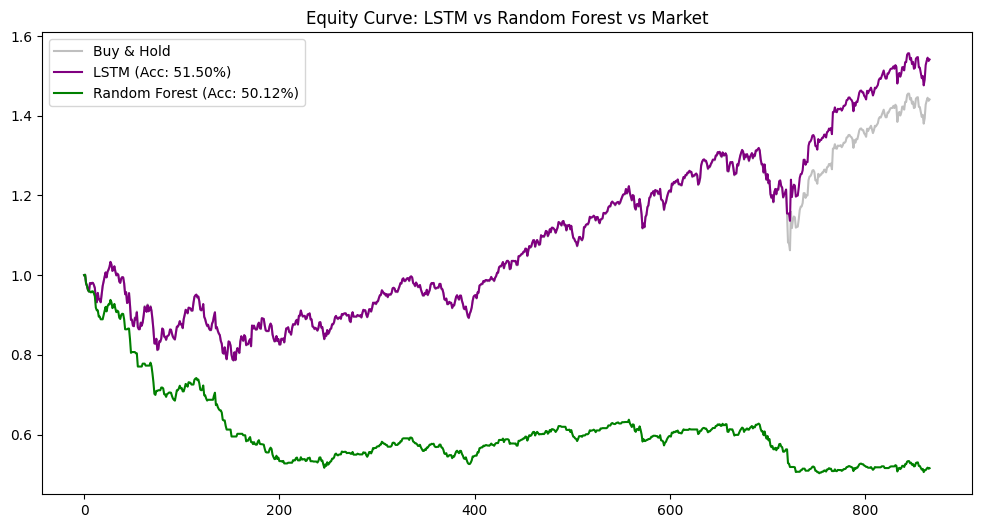

In [12]:
# === Comparative Dashboard ===
print("\n=== MODEL SHOWDOWN ===")
print(f"LSTM Accuracy:        {acc_lstm:.2%}")
print(f"Random Forest Acc:    {acc_rf:.2%}")
print("-" * 30)

if acc_lstm > acc_rf:
    print("🏆 Winner: LSTM (Complex temporal patterns found)")
else:
    print("🏆 Winner: Random Forest (Robustness to noise prevailed)")

# === Cumulative Return Curve (Hypothetical Trading) ===
# Let's simulate investing $1 based on predictions
# Logic: If pred=1, Buy/Hold. If pred=0, Cash (Return=0).
# Note: We use y_test_rf index to get actual returns
actual_returns = test_df['Return'].iloc[SEQ_LEN:].values

# Calculate Strategy Returns
equity_lstm = [1.0]
equity_rf = [1.0]
equity_hold = [1.0]

for i in range(len(actual_returns)):
    ret = actual_returns[i]
    
    # Buy & Hold
    equity_hold.append(equity_hold[-1] * (1 + ret))
    
    # LSTM Strategy
    # If pred is 1, we get the return. If 0, we get 0.
    equity_lstm.append(equity_lstm[-1] * (1 + (ret if preds_lstm[i] == 1 else 0)))
    
    # RF Strategy
    equity_rf.append(equity_rf[-1] * (1 + (ret if preds_rf[i] == 1 else 0)))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(equity_hold, label='Buy & Hold', color='gray', alpha=0.5)
plt.plot(equity_lstm, label=f'LSTM (Acc: {acc_lstm:.2%})', color='purple')
plt.plot(equity_rf, label=f'Random Forest (Acc: {acc_rf:.2%})', color='green')
plt.title("Equity Curve: LSTM vs Random Forest vs Market")
plt.legend()
plt.show()